In [1]:
%cd ..

C:\Users\Test\Geoalert\aeronetlib\aeronet_raster


## Задача: Изображение размером 10х10, пройти с окном 8х8 с пересечением между окнами (margin) 2 пикселя

### Новая версия

In [ ]:
from aeronet_raster import dataprocessor
from aeronet_raster.dataadapters import numpyadapter
from matplotlib import pyplot as plt
import numpy as np

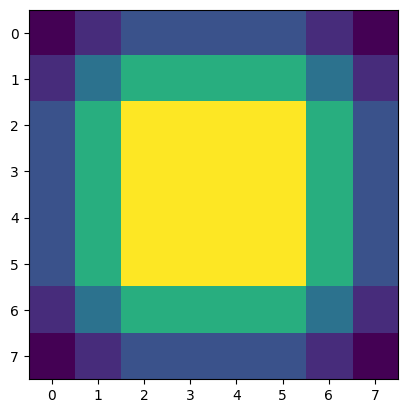

In [17]:
# маска для sample_size=(8, 8), margin=(2, 2)
plt.imshow(dataprocessor.get_blend_mask((8, 8), (2, 2)))

Writing at (-2, -2)


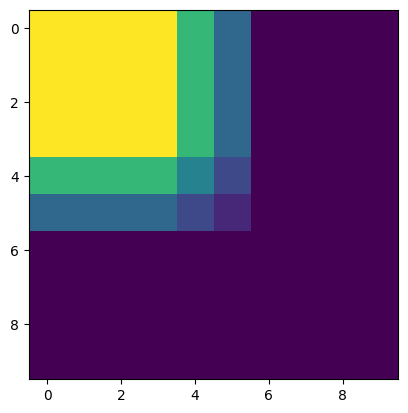

Writing at (4, -2)


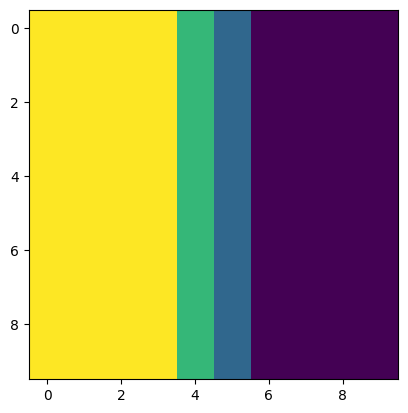

Writing at (-2, 4)


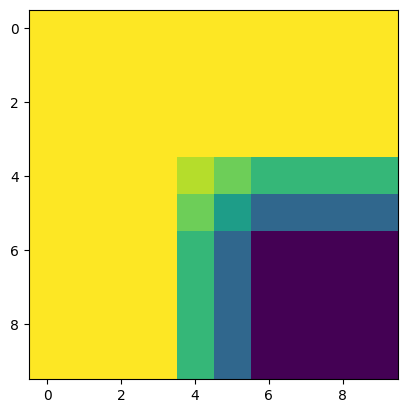

Writing at (4, 4)


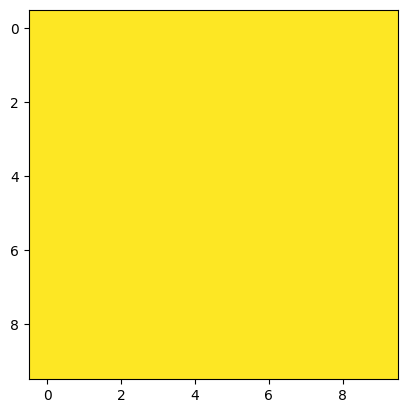

In [40]:
mask = dataprocessor.get_blend_mask((8, 8), (2, 2))
data = numpyadapter.NumpyWriter(np.zeros((10, 10)))  # NumpyWriter нужен чтобы корректно писать по координатам в out of bounds, например, (-2, -2)
stride = 8-2 # шаг окна 
for x in range(-2, 10, stride):
    for y in range(-2, 10, stride):
        data[y:y+8, x:x+8] += mask
        print(f'Writing at ({y}, {x})')
        plt.imshow(data._data, vmin=0, vmax=1)
        plt.show()


### Старая версия

In [43]:
from aeronet_raster.utils import calc_window_weight_mtrx
from aeronet_raster.dataadapters import numpyadapter
from matplotlib import pyplot as plt
import numpy as np

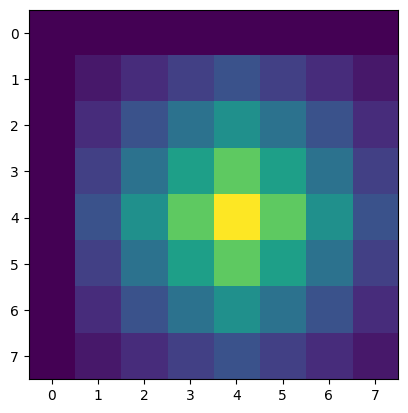

In [45]:
# здесь effective_sample_size = 8-2*2 = 4
plt.imshow(calc_window_weight_mtrx.calc_weight_mtrx((4, 4), 2))

Writing at (-2, -2)


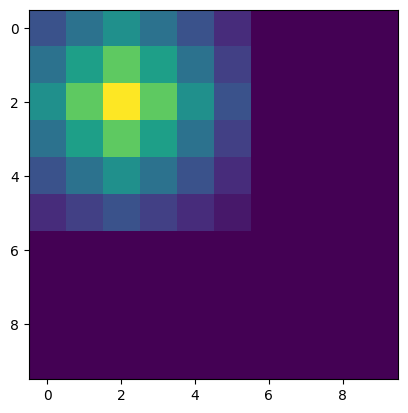

Writing at (4, -2)


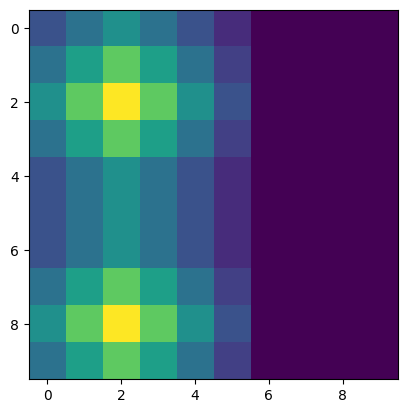

Writing at (-2, 4)


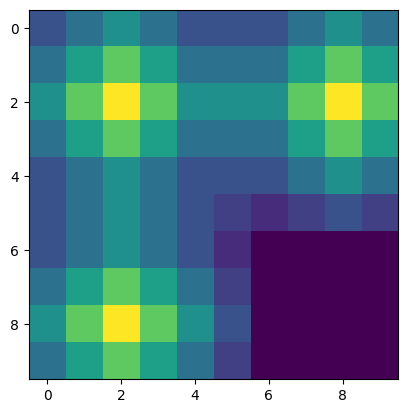

Writing at (4, 4)


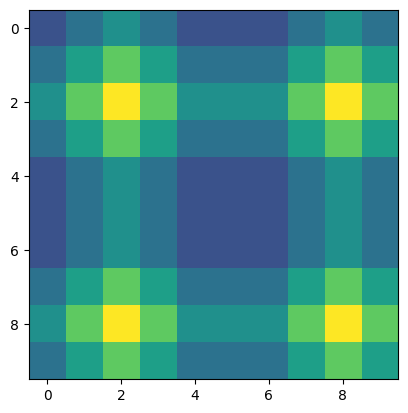

In [46]:
mask = calc_window_weight_mtrx.calc_weight_mtrx((4, 4), 2)
data = numpyadapter.NumpyWriter(np.zeros((10, 10)))  # NumpyWriter нужен чтобы корректно писать по координатам в out of bounds, например, (-2, -2)
stride = 8-2 # шаг окна 
for x in range(-2, 10, stride):
    for y in range(-2, 10, stride):
        data[y:y+8, x:x+8] += mask
        print(f'Writing at ({y}, {x})')
        plt.imshow(data._data, vmin=0, vmax=1)
        plt.show()
